# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import random
import pandas as pd
import matplotlib
%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def dice(n):
    outcome = []
    for i in range(n):
        choice = random.randint(1,6)
        outcome.append(choice)
    return pd.DataFrame(outcome)
dice_df = dice(10)
dice_df

,0
0,4
1,2
2,5
3,1
4,6
5,6
6,5
7,1
8,5
9,4


#### 2.- Plot the results sorted by value.

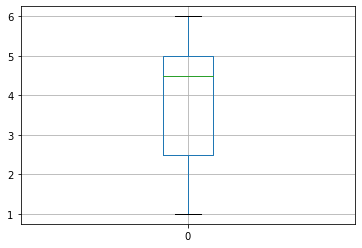

In [11]:
dice_df_sort = dice_df.sort_values(by=0,axis=0,ascending=False)
dice_df_sort.boxplot()


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

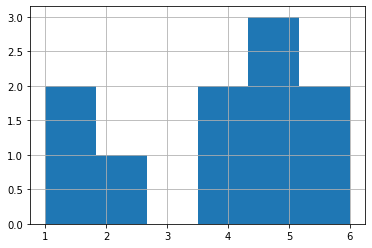

In [51]:
dice_df[0].hist(bins=6)


In [ ]:
"""
From the histogram above, we can see how there is a relevant number of elements between ranges 4-6.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [16]:
def mean(list):
    sum = 0
    count = 0
    for x in list:
        sum = sum + x
        count = count + 1
    return sum / count

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [20]:
freq = dice_df[0].value_counts()
mean(freq)

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [23]:
def find_median(sorted_list):
    indices = []

    list_size = len(sorted_list)
    median = 0

    if list_size % 2 == 0:
        indices.append(int(list_size / 2) - 1)  # -1 because index starts from 0
        indices.append(int(list_size / 2))

        median = (sorted_list[indices[0]] + sorted_list[indices[1]]) / 2
        pass
    else:
        indices.append(int(list_size / 2))

        median = sorted_list[indices[0]]
        pass

    return median, indices
    pass

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [27]:
median, median_indices = find_median(dice_df[0])
Q1, Q1_indices = find_median(dice_df[0][:median_indices[0]])
Q2, Q2_indices = find_median(dice_df[0][median_indices[-1] + 1:])

quartiles = [Q1, median, Q2]

'median, median_indices = find_median(dice_df[0])\nQ1, Q1_indices = find_median(dice_df[0][:median_indices[0]])\nQ2, Q2_indices = find_median(dice_df[0][median_indices[-1] + 1:])\n\nquartiles = [Q1, median, Q2]\n'

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [45]:
roll_100 = pd.read_csv('..\\data\\roll_the_dice_hundred.csv')
roll_100 = roll_100.sort_values(by='value',axis=0,ascending=False)
roll_100

,Unnamed: 0,roll,value
99,99,99,6
36,36,36,6
23,23,23,6
24,24,24,6
90,90,90,6
30,30,30,6
87,87,87,6
35,35,35,6
39,39,39,6
92,92,92,6


In [ ]:
"""
I see a table with 100 rows in which each of them represent a die roll and its value."""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [39]:
mean(roll_100['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [46]:
freq_100 = roll_100['value'].value_counts()
freq_100

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

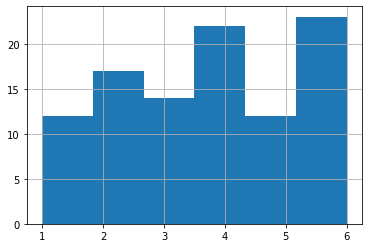

In [50]:
roll_100['value'].hist(bins=6)

The mean value of this is 3.74, a bit higher than a mean of just 1+6/2 {3,5} this indicates that there is a smaller higher number of values in the bin [4-6] than in the [1-3] one. This can also be seen at the histogram, where 4 and 6 look more relevant than the others.

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [54]:
roll_1000 = pd.read_csv('..\\data\\roll_the_dice_thousand.csv')
freq_1000 = roll_1000['value'].value_counts()
freq_1000


3    175
1    175
4    168
2    167
6    166
5    149
Name: value, dtype: int64

At the very first sight, there is a feeling that frequency got aligned into a less spread number (before it was between 12 and 22), now it feels they are closer (149 to 175).

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E05C644550>]],
      dtype=object)

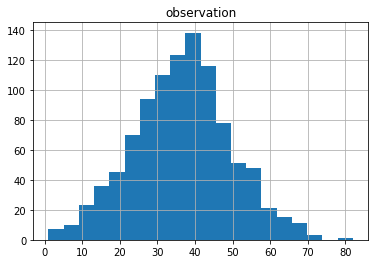

In [73]:
ages_pop = pd.read_csv('..\\data\\ages_population.csv')
freq_ages = ages_pop['observation'].value_counts()
ages_pop.hist(bins=20)

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [68]:
ages_pop.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


The mean is 36,56 with a standard deviation of 12,8. Which, although not knowing exactly, does not differ too much from what could be expected.

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E05C8C8278>]],
      dtype=object)

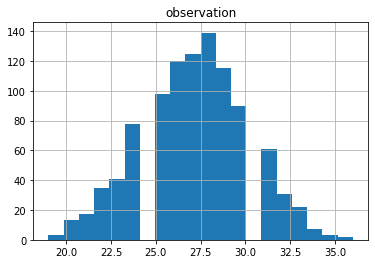

In [83]:
ages_pop2 = pd.read_csv('..\\data\\ages_population2.csv')
freq_ages2 = ages_pop2['observation'].value_counts()
ages_pop2.hist(bins=20)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

There is a way narrower range of ages in this distribution. The min and max are way closer. The mean has to be around 27 and the standard deviation will be way smaller than in step 1.

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [84]:
ages_pop2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


Both mean and std are smaller. In the case of the mean, it makes lots of sense as the numbers range are between 19 and 36. This also forces the standard deviation to be way smaller, specially seeing how most of the numbers are grouped in the center of the distribution.

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E05C969F60>]],
      dtype=object)

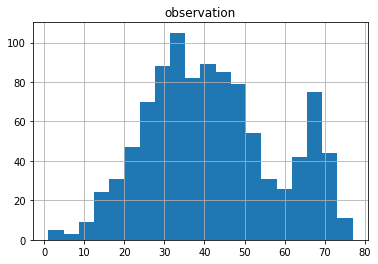

In [87]:
ages_pop3 = pd.read_csv('..\\data\\ages_population3.csv')
freq_ages3 = ages_pop3['observation'].value_counts()
ages_pop3.hist(bins=20)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [88]:
ages_pop3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


The mean is greater than 40, especially weighted by very high values around the 70 range. For this reason as well, the standard deviation is higher than in the step 1. This means the values are more dispersed.

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [89]:
ages_pop3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


There is a difference of more than 1,9 between the mean and the median, which is tells us that the distribution is slightly skewed to the left.

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [103]:
ages_pop['observation'].quantile(0.95)

58.0

There is a smaller distance between the 50% and 75% percentiles which make us believe most of the values are between that range.

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""